In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [21]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res

        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

<>:94: SyntaxWarning: invalid escape sequence '\p'
<>:94: SyntaxWarning: invalid escape sequence '\p'
/var/folders/k3/wmzr3p556_lfwkhblb73t5080000gn/T/ipykernel_34820/712581970.py:94: SyntaxWarning: invalid escape sequence '\p'
  """Return the vector of partial derivatives \partial C_x /


In [22]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [23]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('../nielsen_code/git_repo/data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [24]:
TRAIN, VALIDATION, TEST = load_data()

In [25]:
def zip_data(D):
    return list(zip(D[0], D[1]))

In [26]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [27]:
def plot_digit(x):
    IM = np.reshape(x, (28, 28))
    plt.imshow(1-IM, cmap='gray', vmin=0, vmax=1)

(None, 5)

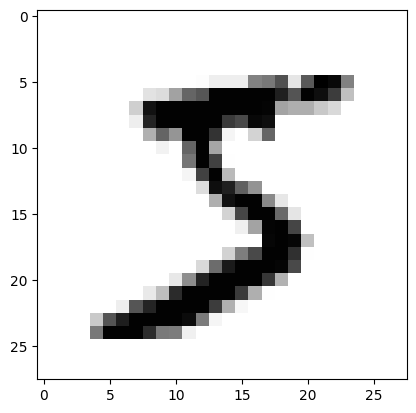

In [28]:
plot_digit(train_data[0][0]), train_data[0][1]

In [29]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.legend()
    
    print(results[-1][1][1])

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
0.9425


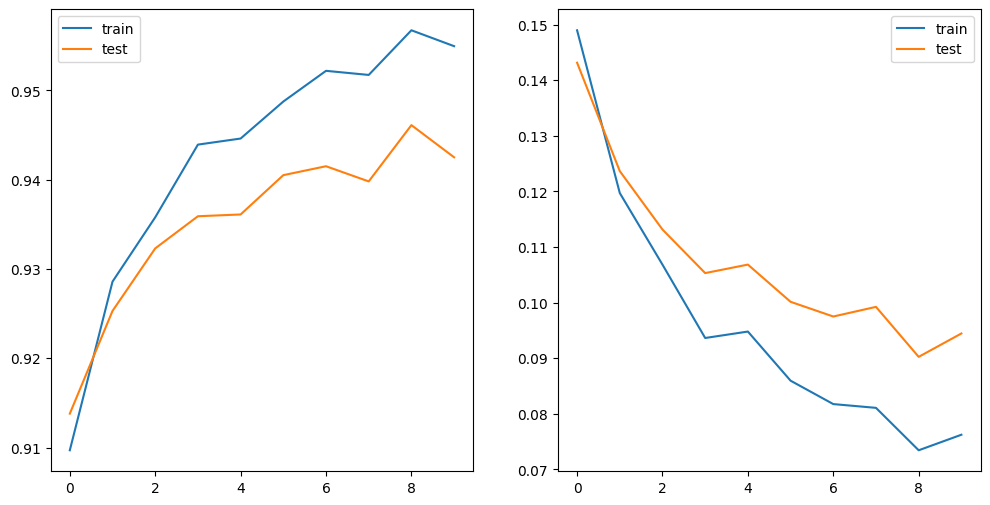

In [30]:
NET = Network(30)
results = NET.SGD(train_data, 10, 10, 3.0, test_data)
plot_results(results)

In [31]:
RPERM = np.random.permutation(784)

In [32]:
RPERM

array([335, 379, 505, 749, 373, 638,  61, 485, 572, 709, 527, 159, 582,
       656, 211, 419, 105, 216, 610, 209, 510, 259,  60, 102, 110, 469,
       143, 566, 673, 314, 282, 243, 386, 437, 264, 441, 300, 724, 541,
       212, 716, 348, 182, 202, 392,  25, 600, 701,  19, 119, 710, 470,
       107, 643, 430, 185, 286, 554, 130,  33, 327, 650, 420,  29, 315,
       762, 225, 680, 360, 764, 645, 460, 699, 571, 254, 329, 781, 613,
       144, 446, 549,  46,  42, 676, 338, 708, 390, 475, 155,  89, 129,
       362, 589,  55,  64, 431, 500, 598, 334,  56, 322, 748, 653, 165,
       193, 637, 622, 399, 352, 152, 694, 237,  82, 730,  92, 106, 753,
       696, 201, 132, 689, 692, 213, 111, 176, 422, 768, 731, 581, 720,
       178,  53, 463, 776, 603, 124, 301, 553, 281, 519, 221, 318,  14,
       336, 293,  72, 303, 456, 366, 224, 179, 356, 548, 306, 478, 339,
       714, 411, 428, 621, 560, 646, 116, 670, 728, 265, 538, 206, 271,
       365, 635,  50, 191,  75, 146, 442, 160, 142,  78, 473, 16

In [33]:
def apply_permutation(perm, x):
    return np.array([x[perm[i]] for i in range(len(x))])
def permute_data(perm, data):
    return [(apply_permutation(perm, x), y) for x, y in data]

In [34]:
permuted_train = permute_data(RPERM, train_data)
permuted_validation = permute_data(RPERM, validation_data)
permuted_test = permute_data(RPERM, test_data)

(None, 2)

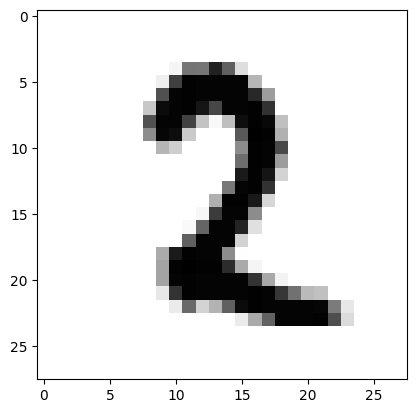

In [36]:
plot_digit(train_data[0][0]), train_data[0][1]

(None, 2)

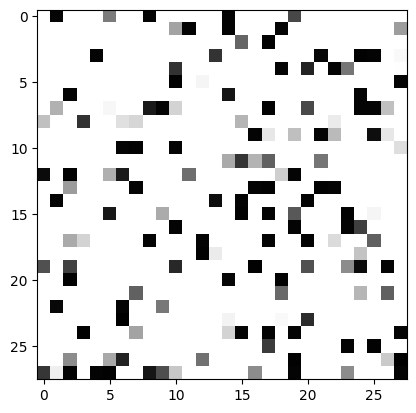

In [37]:
plot_digit(permuted_train[0][0]), permuted_train[0][1]

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
0.9425


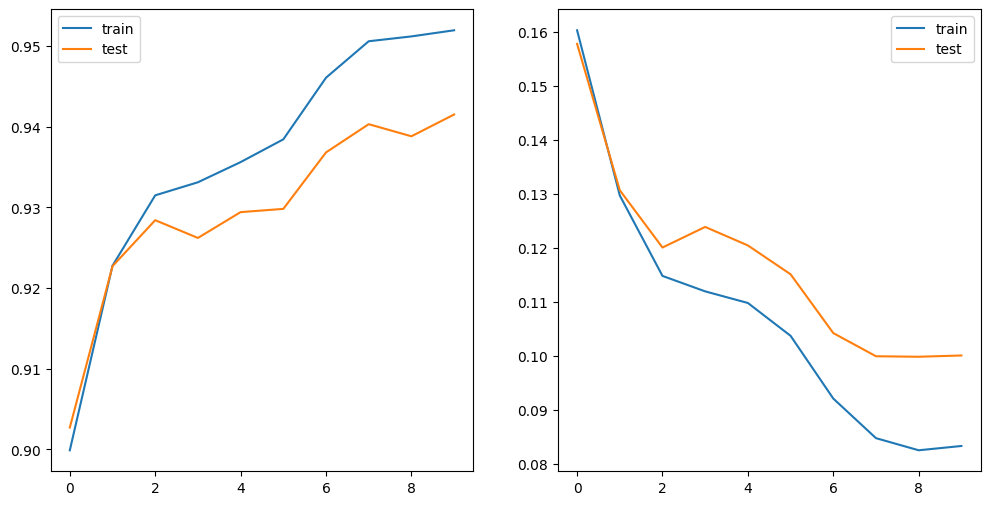

In [38]:
PERMUTED_NET = Network(30)
permuted_results = PERMUTED_NET.SGD(permuted_train, 10, 10, 3.0, permuted_test)
plot_results(permuted_results)